## Import Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Quality Check:

In [3]:
df=pd.read_csv("dynamic_pricing.csv")

In [4]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [11]:
#check datatypes and missing values:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [12]:
non_null_counts=df.notnull().sum()

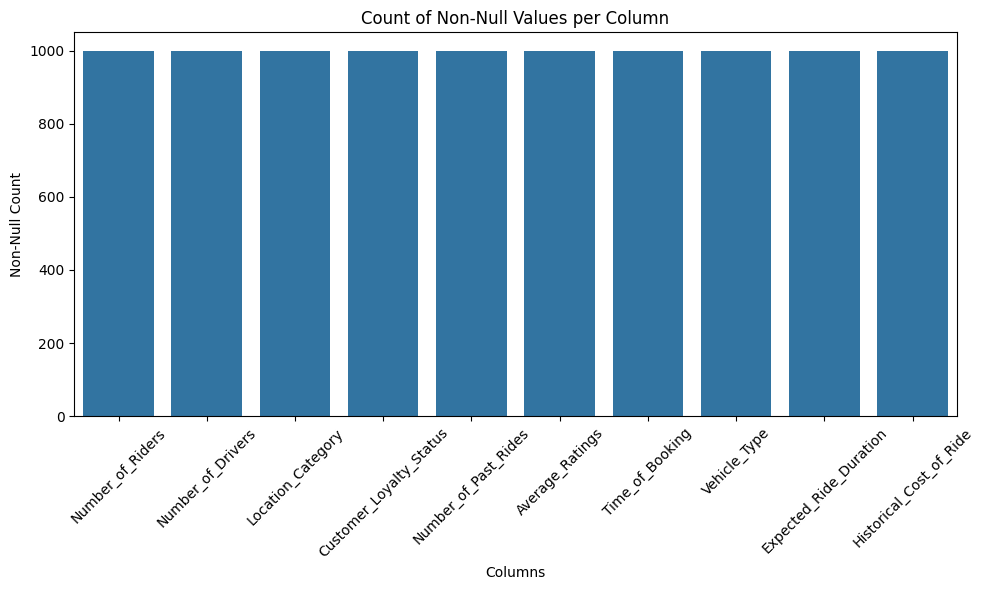

In [13]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=non_null_counts.index, y=non_null_counts.values)

plt.title('Count of Non-Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Non-Null Count')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


## Analyze Distribution of Numerical Features:

In [ ]:
# Summary statistics for numerical features
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


## Plot Distributions for Numerical Features:

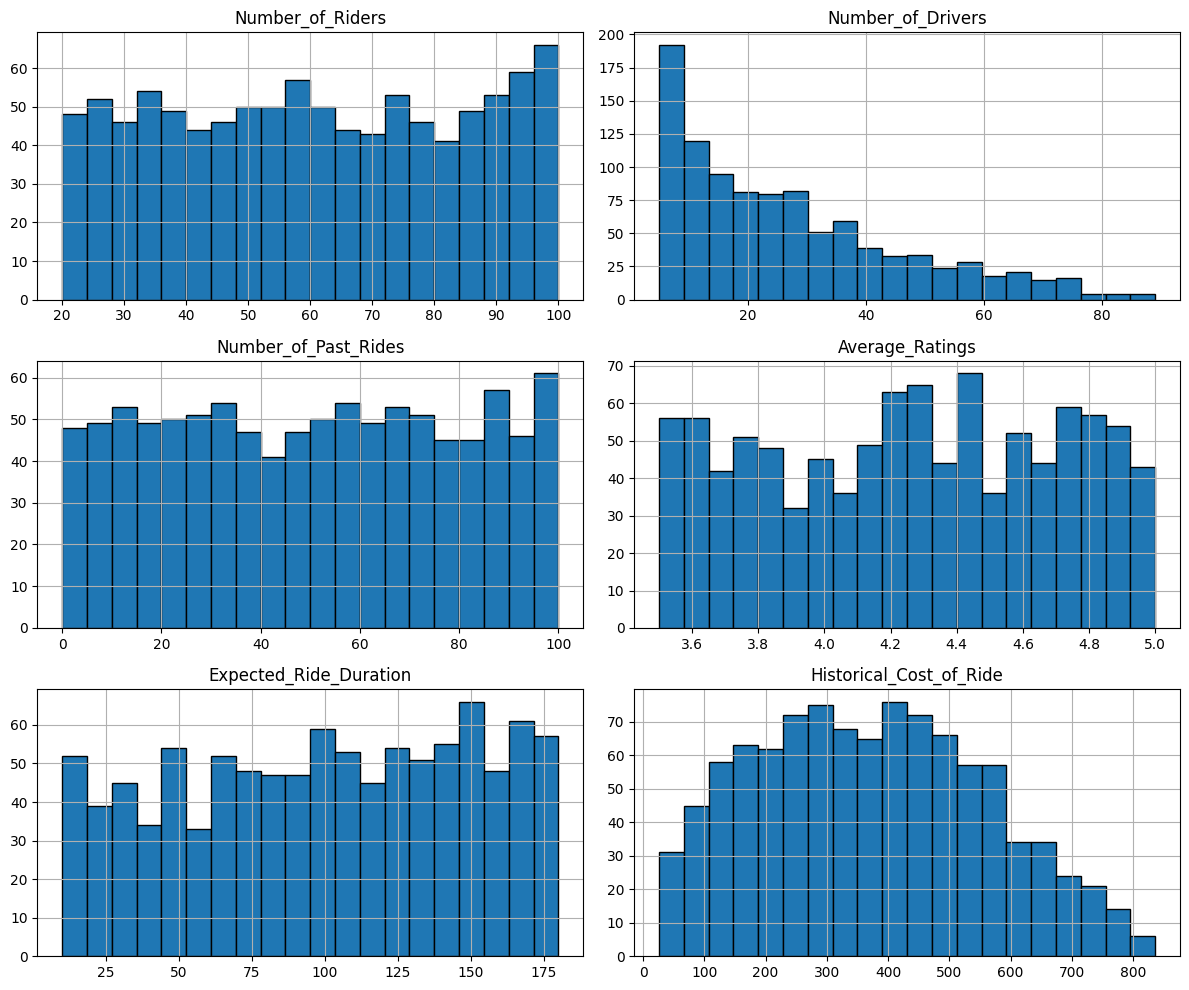

In [ ]:
# Plot histograms for numerical features
numerical_features = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

df[numerical_features].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

### Insights:

- **Number_of_Riders**: Riders are evenly spread out, with a slight increase near 100 riders.
- **Number_of_Drivers**: Most rides happen when there are fewer drivers, and very few rides happen with many drivers.
- **Number_of_Past_Rides**: No clear pattern; past rides are spread out evenly.
- **Average_Ratings**: Most ratings are between 4.0 and 4.6, with peaks around 4.3 and 4.6.
- **Expected_Ride_Duration**: Ride durations are varied, with no strong focus on specific times.
- **Historical_Cost_of_Ride**: Most rides cost between $200 and $600, centered around $400.


## Explore Categorical Features:

In [ ]:
# Count the values for categorical features
categorical_features = ['Location_Category', 'Customer_Loyalty_Status', 'Vehicle_Type', 'Time_of_Booking']

for feature in categorical_features:
    print(df[feature].value_counts())

Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64
Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64
Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64
Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64


## Plot Counts of Each Category:

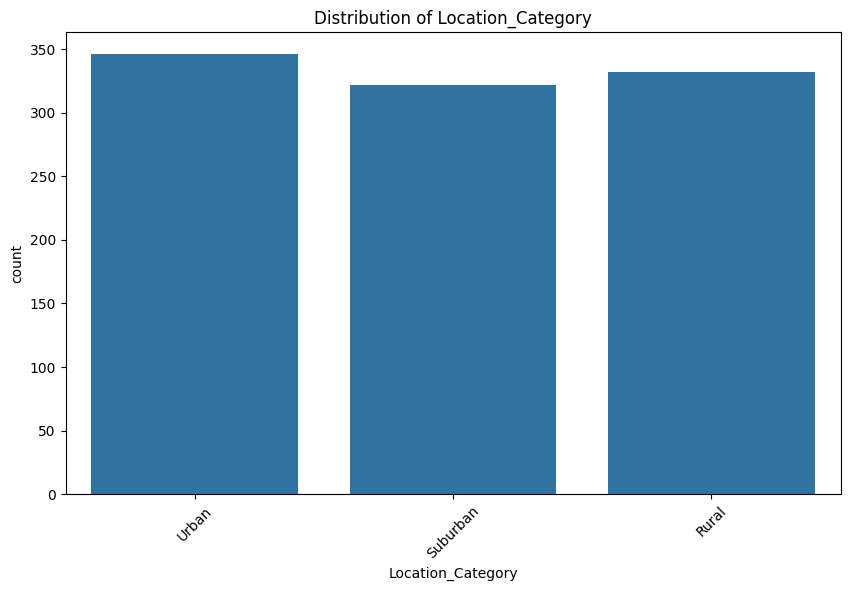

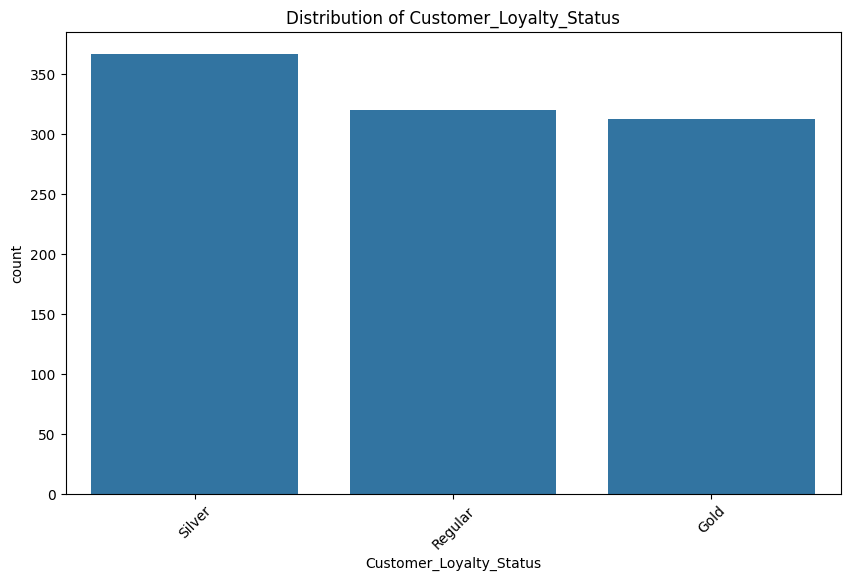

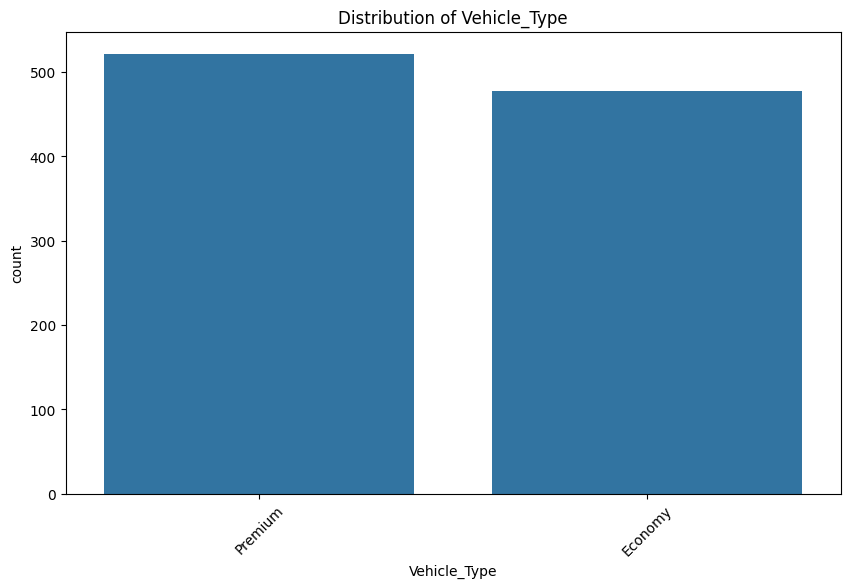

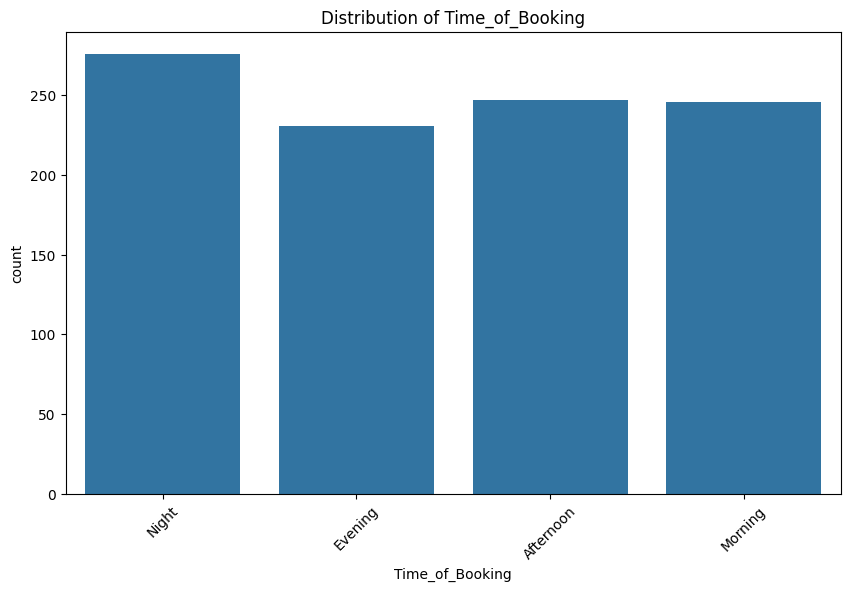

In [ ]:
# Plot counts for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

## Insights:

**Location Distribution:** 
- The Urban and Rural categories have similar counts, both around 350, while Suburban is slightly lower.
- This suggests that both urban and rural areas show strong interest, while suburban areas have a bit less engagement.

**Distribution of customer loyality status:**
- *Silver:* Most common with over 350 customers.
- *Regular:* Slightly fewer than Silver.
- *Gold:* Similar count to Regular, fewer customers overall.

**Vehicle Type Distribution:**
- The counts for Premium and Economy vehicles are almost equal, each around 500.
- This indicates that there is similar demand for both types, with no significant difference in interest.

**Distribution of time of booking:**
- **Night:** Highest count with over 250 bookings, indicating it is the most popular time for reservations.
- **Afternoon and Morning:** Both are similar in count, slightly below Evening, showing less preference relative to Night.
- - **Evening:** Lower count than afternoon, morning and Night.

## Analysis Summary for Categorical and Numerical Features:

**Categorical Features:**
- **Location_Category:** Balanced distribution across Urban, Rural, and Suburban areas, with Urban slightly leading.
- **Customer_Loyalty_Status:** Silver dominate, while Gold and regular are less common.
- **Vehicle_Type:** Nearly equal demand for Premium and Economy vehicles.
- **Time_of_Booking:** Night is the most popular booking time.

**Numerical Features:**
- **Number_of_Riders:** Evenly distributed with a slight increase near 100 riders.
- **Number_of_Drivers:** Most rides occur with fewer drivers, hinting at a demand-supply gap.
- **Number_of_Past_Rides:** No clear pattern; past rides are evenly spread.
- **Average_Ratings:** Ratings mostly range between 4.0 and 4.6, indicating general satisfaction.
- **Expected_Ride_Duration:** Varied ride durations with no specific focus.
- **Historical_Cost_of_Ride:** Most rides cost between $200 and $600, centered around $400.

## Bivariate Analysis:

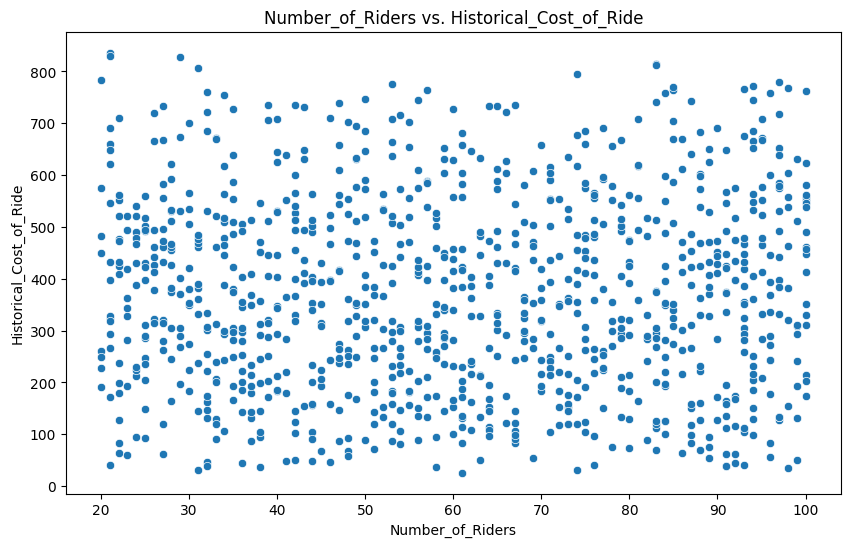

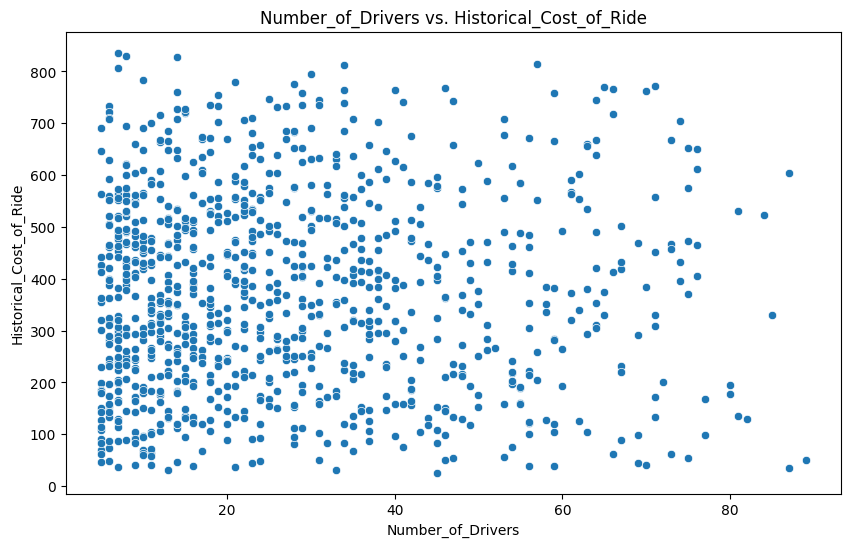

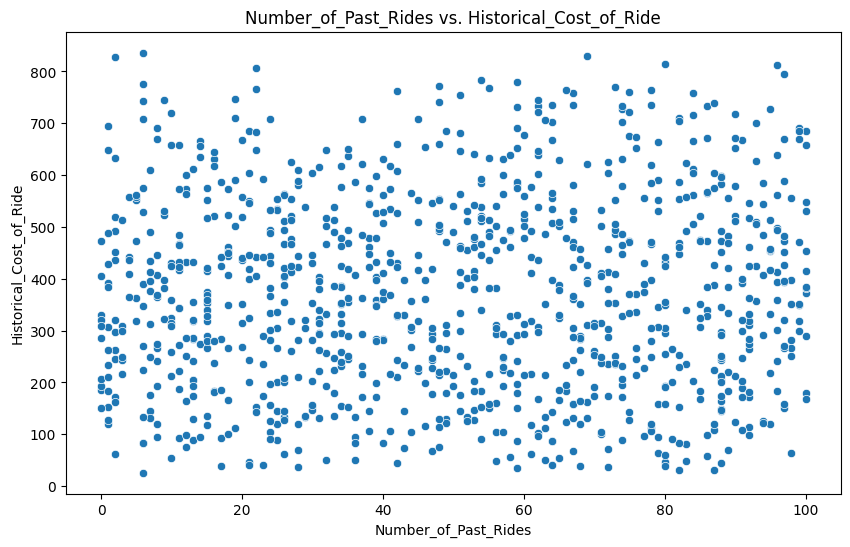

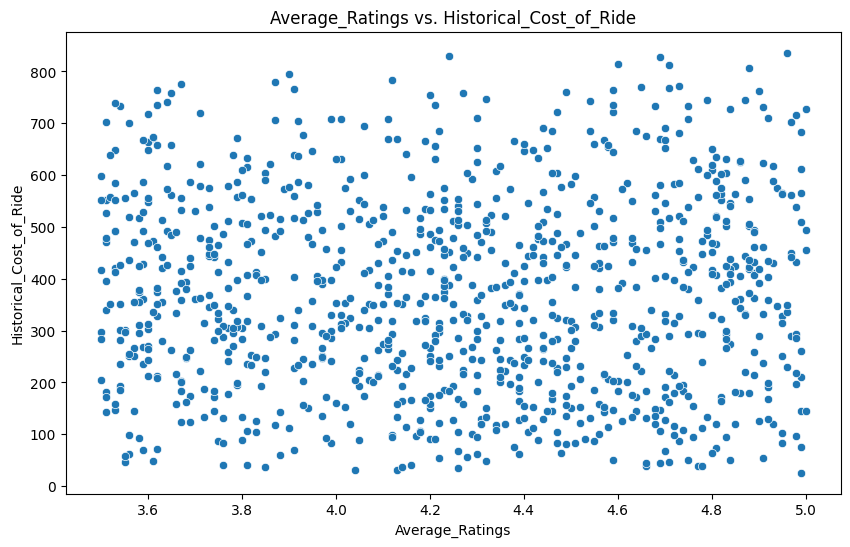

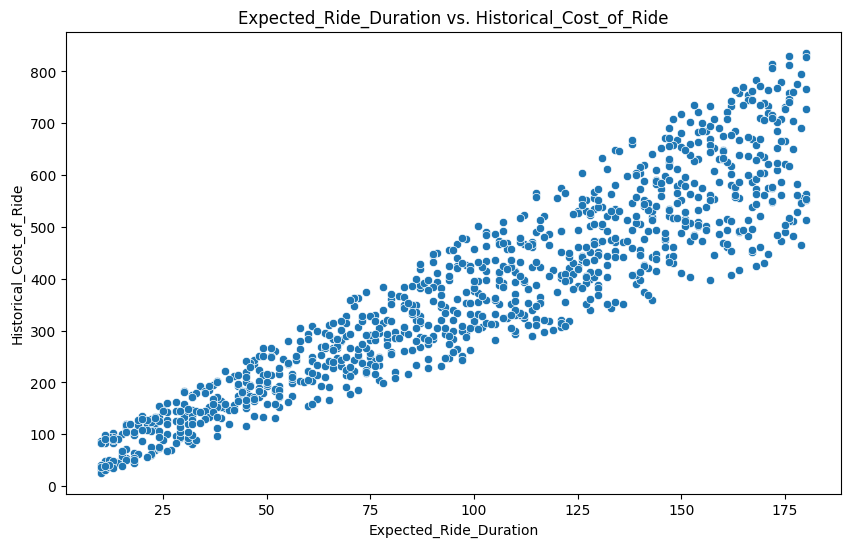

In [ ]:
# Scatter plots for numerical features vs. Historical_Cost_of_Ride
for feature in numerical_features[:-1]:  # Excluding target variable
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Historical_Cost_of_Ride', data=df)
    plt.title(f'{feature} vs. Historical_Cost_of_Ride')
    plt.show()

## Insights:

**Number of riders  vs. Historical cost of rides :**
- The data does not indicate a clear trend, indicating that the cost does not consistently increase or decrease with the number of riders.

**Number of drivers vs. Historical cost of rides :**
- There are more data points clustered at the lower end of the number of drivers (around 0 to 40). This indicates that rides are more frequently associated with a lower number of drivers.
- The distribution of historical costs shows significant variability, with many low-cost rides and fewer high-cost rides, regardless of the number of drivers.

**Number of past rides vs. Historical cost of rides :**
- The data points are scattered throughout suggesting no clear correlation between the number of past rides and ride costs.
- Most costs are concentrated in the lower range, there are occasional higher-cost outliers.

**Average ratings vs. Historical cost of rides :**
- The data points exhibit a broad distribution with no apparent correlation between average ratings and ride costs.
- Most points are clustered within a specific range of ratings (3.6 to 5.0), but costs vary similarly across that range.

**Expected ride duration vs. Historical cost of rides:**
- This graph reveals a clear positive correlation: as the expected ride duration increases, the historical costs tend to increase as well.
- The data points are closely clustered around a linear trend, suggesting a strong relationship between ride duration and pricing.

## Examine Categorical Features' Relationship with Target Variable:

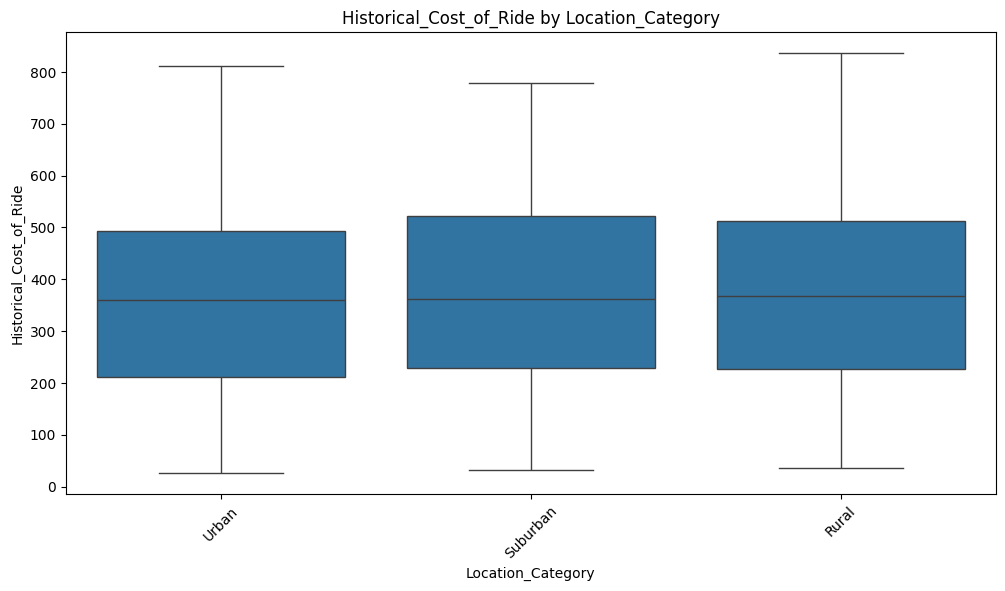

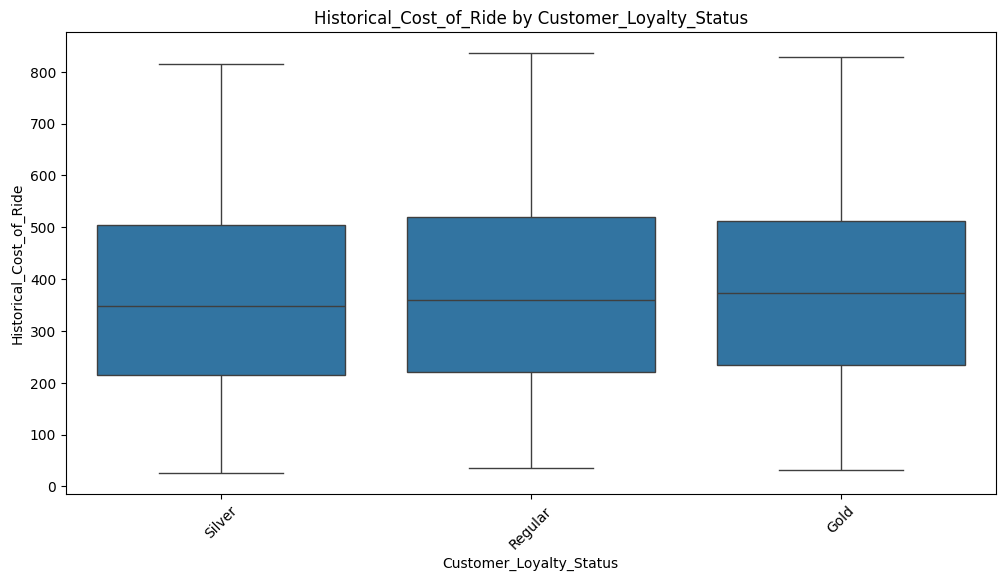

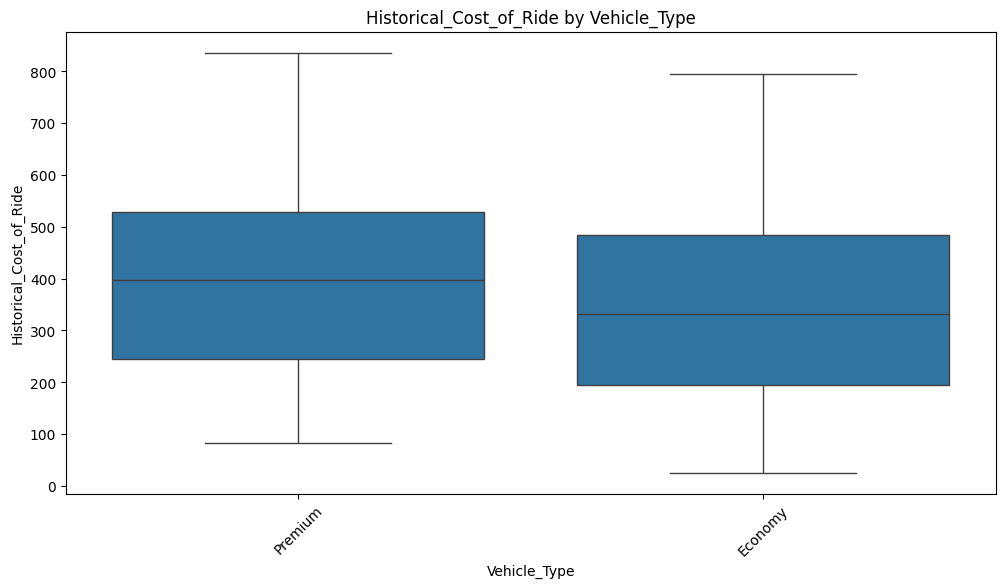

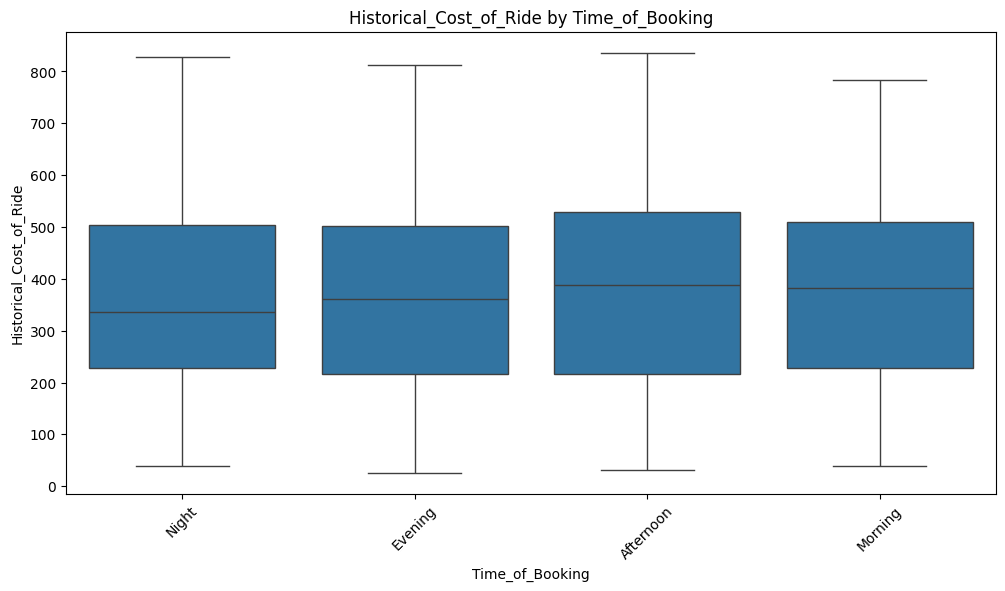

In [ ]:
# Box plots for categorical features vs. Historical_Cost_of_Ride
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='Historical_Cost_of_Ride', data=df)
    plt.title(f'Historical_Cost_of_Ride by {feature}')
    plt.xticks(rotation=45)
    plt.show()


## Insights

### Historical Cost of Ride by Location Category
- **Median Costs**: The median historical costs for each location category are relatively similar, indicating a consistent pricing strategy across urban, suburban, and rural areas.
- **Interquartile Range (IQR)**: The boxes show that the IQRs are comparable across categories, suggesting similar variability in ride costs within each location type.
- **Outliers**: There do not appear to be significant outliers in any category, indicating that most ride costs fall within the expected range for each location type.

### Historical Cost of Ride by Customer Loyalty Status
- **Median Costs**: The median ride costs appear consistent across all loyalty levels, suggesting that customer loyalty status does not significantly impact pricing.
- **Interquartile Range (IQR)**: The IQRs are fairly similar, indicating comparable variability in ride costs among Silver, Regular, and Gold customers.
- **Outliers**: There are no apparent outliers in the plot, which reinforces the idea that costs are stable across different customer loyalty statuses.

### Historical Cost of Ride by Vehicle Type
- **Median Costs**: The median cost for Premium vehicles is notably higher than for Economy vehicles, indicating a clear pricing distinction between the two categories.
- **Interquartile Range (IQR)**: The IQR for Premium vehicles is wider, suggesting greater variability in costs compared to Economy vehicles, which tend to have a more consistent pricing structure.
- **Outliers**: No significant outliers are visible, indicating that costs mostly fall within the expected range for both vehicle types.

### Historical Cost of Ride by Time of Booking
- **Median Costs**: The median costs appear relatively consistent across all time periods, suggesting similar pricing strategies regardless of the time of booking.
- **Interquartile Range (IQR)**: All time categories show comparable IQRs, indicating similar variability in costs for rides booked at different times of the day.
- **Outliers**: There are no noticeable outliers, which implies that the majority of ride costs fall within the expected range for each time category.

## Summary of Insights and Feature Selection

### Insights:

- **Number of Riders vs. Cost:** No clear trend; cost doesn’t consistently change with rider count.
- **Number of Drivers vs. Cost:** More data at lower driver counts; costs vary widely.
- **Number of Past Rides vs. Cost:** No clear correlation; mostly lower costs with some higher outliers.
- **Average Ratings vs. Cost:** No correlation; ratings range from 3.6 to 5.0, with varying costs.
- **Expected Ride Duration vs. Cost:** Positive correlation; longer durations generally lead to higher costs.

### Feature Selection:

- **Categorical Features:**
  - **Location_Category:** Balanced, with a slight preference for Urban.
  - **Customer_Loyalty_Status:** Mainly Silver; Gold and Regular are less common.
  - **Vehicle_Type:** Equal demand for Premium and Economy.
  - **Time_of_Booking:** Night is the peak time.

- **Numerical Features:**
  - **Number_of_Riders:** Evenly distributed, slight peak around 100.
  - **Number_of_Drivers:** Fewer drivers are common, indicating a demand-supply gap.
  - **Number_of_Past_Rides:** Evenly spread, no specific pattern.
  - **Average_Ratings:** Mostly between 4.0 and 4.6.
  - **Expected_Ride_Duration:** Varied, with no specific trend.
  - **Historical_Cost_of_Ride:** Most rides cost between $200 and $600, centered around $400.